[Reference](https://medium.com/the-quantastic-journal/mathematical-understanding-of-gaussian-process-eaffc9c8a6d6)

In [2]:
!pip install GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm, multivariate_normal
from sklearn.linear_model import LinearRegression
from sklearn import datasets

import GPy

# Linear data

coefficient: [[4.58017701]]
intercept: [2.38631774]


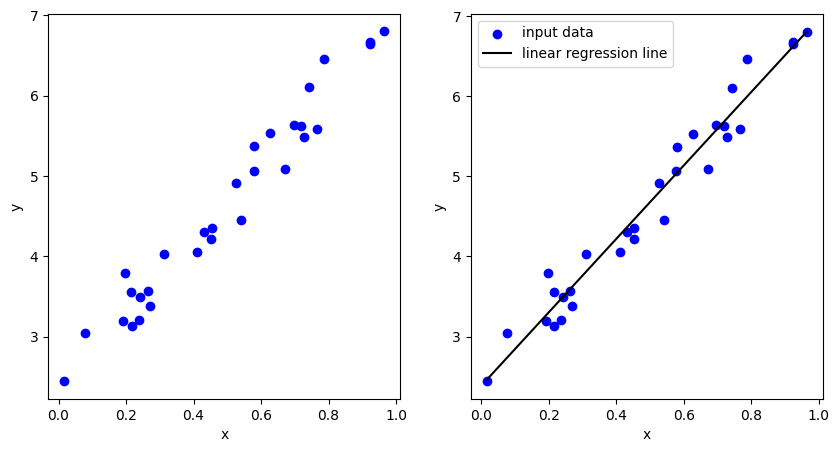

In [4]:
n_samples = 30

w0 = 2.0
w1 = 4.5

x = np.sort(np.random.rand(n_samples))
y = w1 * x + w0 + np.random.rand(n_samples)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print('coefficient:', lr.coef_)
print('intercept:', lr.intercept_)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue', label='input data')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x, y, color='blue', label='input data')
ax[1].plot(x, lr.predict(x), color='black', label='linear regression line')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()
plt.show()

# Non-linear data

coefficient: [[-2.37936145]]
intercept: [1.62649646]


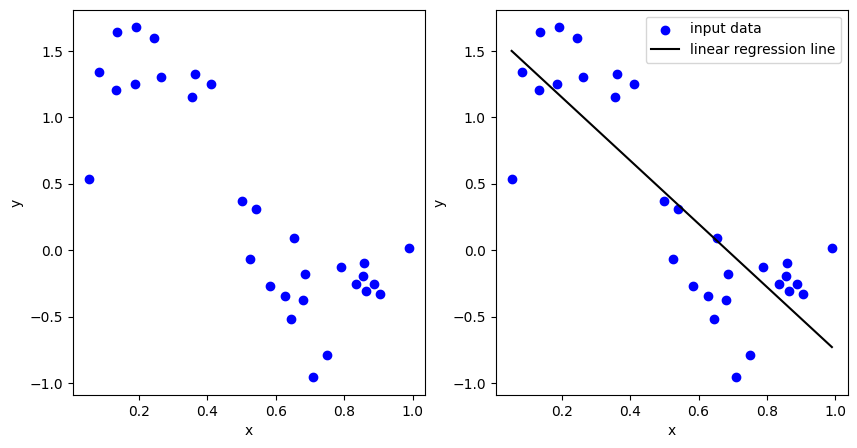

In [5]:
n_samples = 30

x = np.sort(np.random.rand(n_samples))
y = np.sin(2.0 * np.pi * x) + np.random.rand(n_samples)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print('coefficient:', lr.coef_)
print('intercept:', lr.intercept_)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue', label='input data')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x, y, color='blue', label='input data')
ax[1].plot(x, lr.predict(x), color='black', label='linear regression line')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

plt.show()

# Radial basis function regression

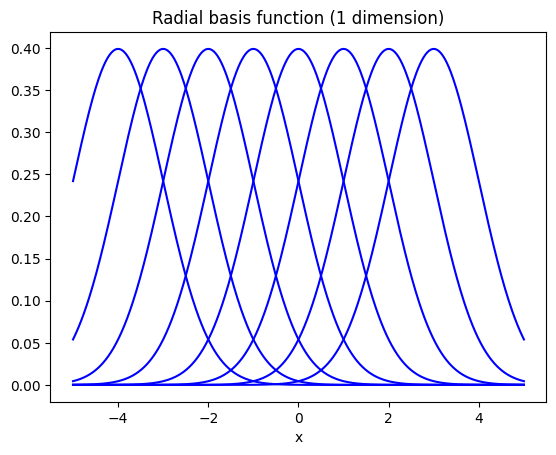

In [6]:
# the mu values for radial basis function
mus = np.array([i for i in range(-4, 4, 1)])

# 1-D input data
x = np.linspace(-5, 5, 500)

# for visualization
fig, ax = plt.subplots(1, 1)

# calculate the pdf of each mu
for mu in mus:
    rv = norm(loc=mu, scale=1.0)
    ax.plot(x, rv.pdf(x), color='blue')

ax.set_xlabel('x')
ax.set_title('Radial basis function (1 dimension)')
plt.show()

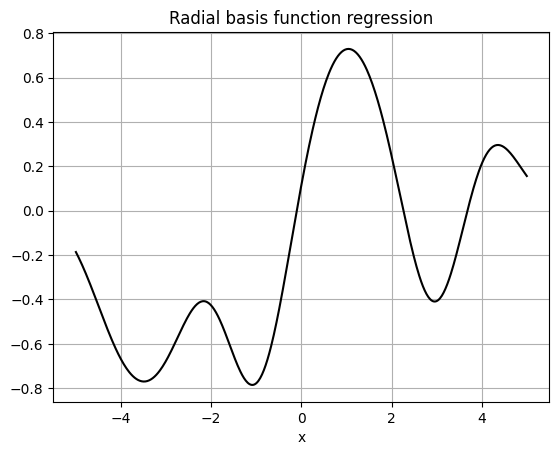

In [8]:
# the mu values for radial basis function
mus = np.array([i for i in range(-4, 5, 1)])

# weights for the spline function
weights = np.array([-0.48, -0.52, 0.1, -0.9, 0.23, 0.57, 0.28, -0.69, 0.46])

# 1-D input data
x = np.linspace(-5, 5, 500)

y = np.zeros(x.shape)

for i in range(len(x)):
    for j in range(len(weights)):
        y[i] += weights[j] * np.exp(-(x[i]-mus[j])**2)

# for visualization
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, color='black')
ax.set_xlabel('x')
ax.set_title('Radial basis function regression')
plt.grid()
plt.show()

# Merginal distribution visualization

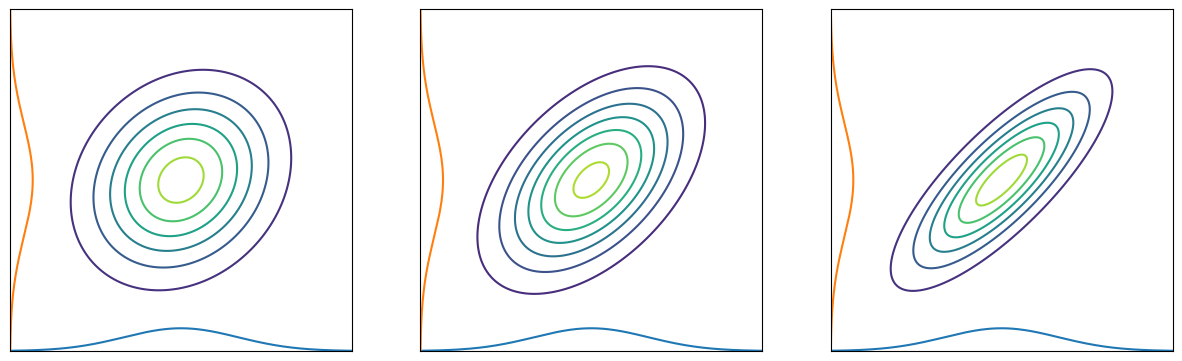

In [9]:
# Marginal distribution

mus = [[0, 0] for _ in range(3)]
covs = [[[1, 0.2], [0.2, 1]], [[1, 0.5], [0.5, 1]], [[1, 0.8], [0.8, 1]]]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

max_val = 3
min_val = -3

N = 200
x = np.linspace(min_val, max_val, N)
y = np.linspace(min_val, max_val, N)
X, Y = np.meshgrid(x, y)

pos  = np.dstack((X, Y))

for i in range(3):
    mu = mus[i]
    cov = covs[i]

    rv   = multivariate_normal(mu, cov)
    Z    = rv.pdf(pos)

    ax[i].contour(X, Y, Z)
    ax[i].set_aspect('equal', adjustable='box')

    rv1 = norm(mu[0], cov[0][0])
    z1 = rv1.pdf(x)
    ax[i].plot(x, z1-max_val)

    rv2 = norm(mu[1], cov[1][1])
    z2 = rv2.pdf(y)
    ax[i].plot(z2-max_val, y)

    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.grid()
plt.show()

# Conditional distribution visualization

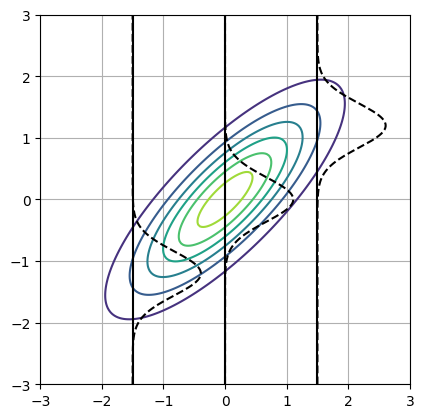

In [10]:
# Conditional distribution

mus = [0, 0]
covs = [[1, 0.8], [0.8, 1]]

fig, ax = plt.subplots(1, 1)

max_val = 3
min_val = -3

N = 200
x = np.linspace(min_val, max_val, N)
y = np.linspace(min_val, max_val, N)
X, Y = np.meshgrid(x, y)

pos  = np.dstack((X, Y))
rv   = multivariate_normal(mu, cov)
Z    = rv.pdf(pos)

ax.contour(X, Y, Z)
ax.set_aspect('equal', adjustable='box')

for c in [-1.5, 0, 1.5]:
    cond_mu = mu[1] + covs[1][0] * (1 / covs[0][0]) * (c - mu[0])
    cond_cov = covs[1][1] - covs[1][0] * (1 / covs[0][0]) * covs[0][1]

    rv1 = norm(cond_mu, cond_cov)
    z1 = rv1.pdf(x)
    ax.plot(z1+c, x, '--', color='black')
    ax.plot([c for _ in range(len(y))], y, color='black')

plt.grid()
plt.show()

# Sampling from Gaussain process using various kernel funcions

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def plot_gpr_samples(gpr_model, n_samples, ax):
    """
    Borrow from https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html

    Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """

    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-3, 3])

# Example dataset to visualize sampling values from various kernels

In [13]:
rng = np.random.RandomState(4)
X_train = rng.uniform(0, 5, 10).reshape(-1, 1)
y_train = np.sin((X_train[:, 0] - 2.5) ** 2)
n_samples = 5

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct, ExpSineSquared

 /usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:284: RuntimeWarning:divide by zero encountered in log
 /usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning:lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
 /usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning:The optimal value found for dimension 0 of parameter k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.


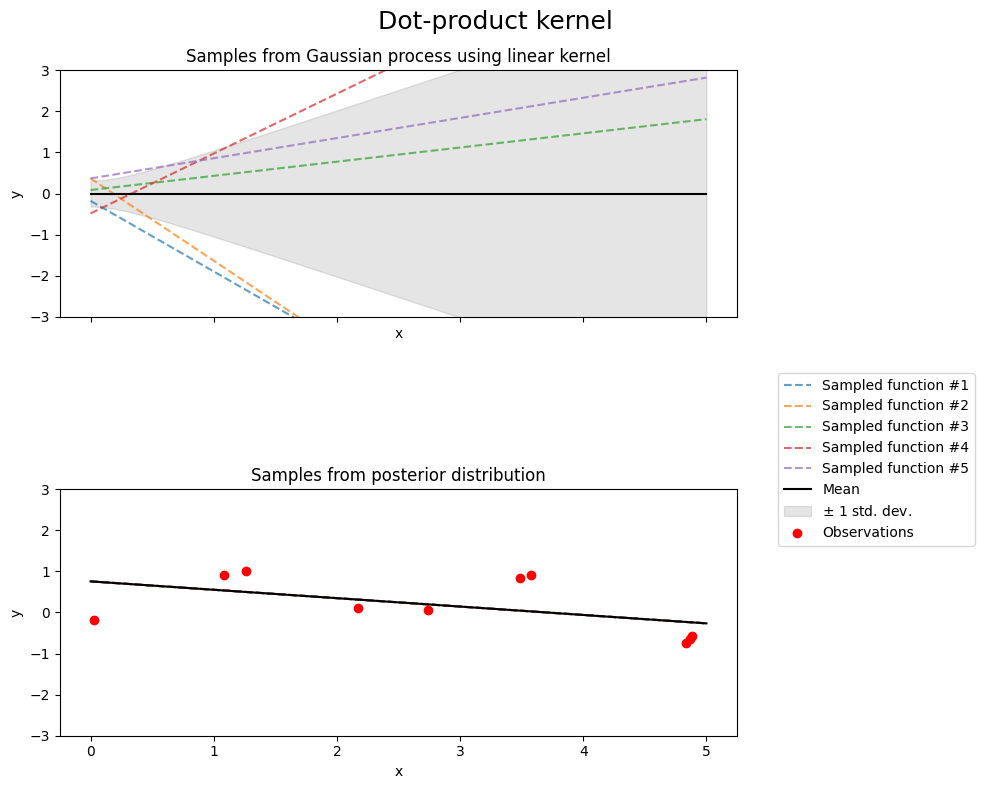

In [15]:
# Linear kernel

kernel = (
    ConstantKernel(0.1, (0.01, 10.0)) + DotProduct(sigma_0=0)
)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from Gaussian process using linear kernel")

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Dot-product kernel", fontsize=18)
plt.tight_layout()

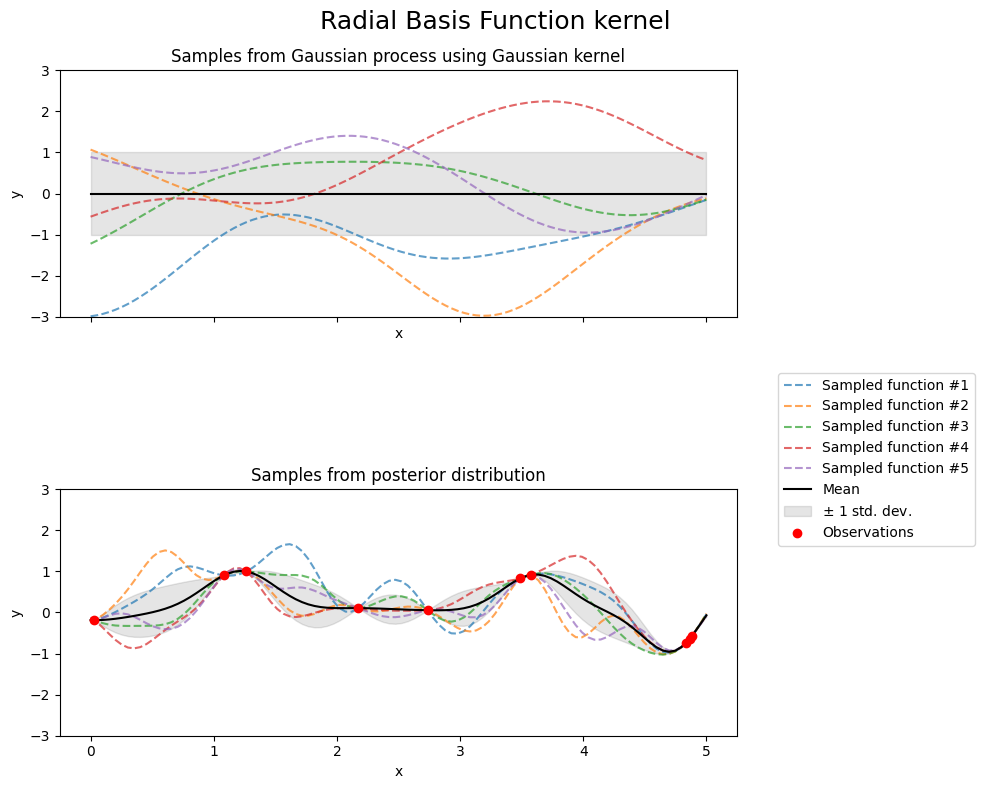

In [16]:
# Gaussian kernel

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from Gaussian process using Gaussian kernel")

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

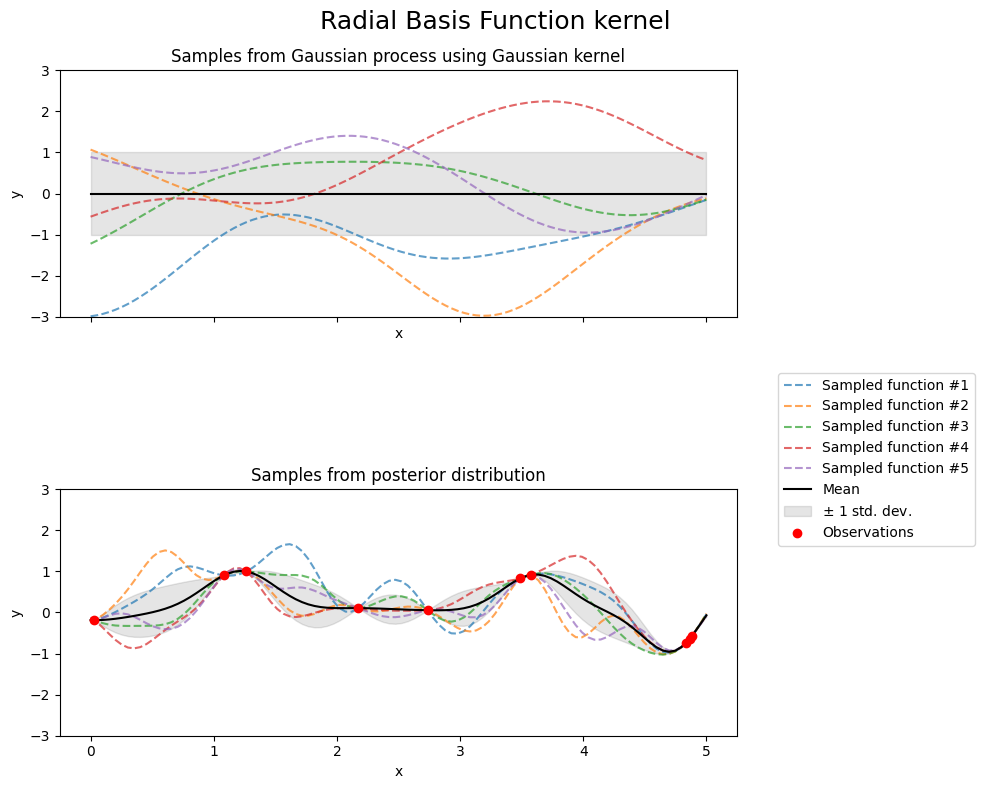

In [17]:
# Gaussian kernel

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from Gaussian process using Gaussian kernel")

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

# Example: Gaissian process model for one-dimensional data

In [18]:
# Generate the randomized sample

X = np.linspace(start=0, stop=10, num=100).reshape(-1, 1)
y = np.squeeze(X * np.sin(X)) + np.random.randn(X.shape[0])
y = y.reshape(-1, 1)

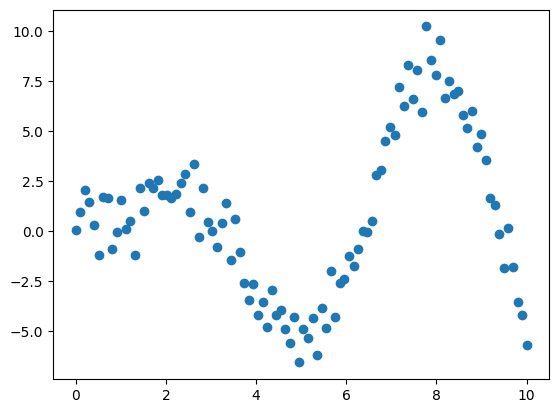

In [19]:
# The input data's visualization

plt.scatter(X, y)
plt.show()

In [20]:
# RBF kernel
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [21]:
# Gaussian process regression using RBF kernel
m = GPy.models.GPRegression(X, y, kernel)

In [22]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


AttributeError: 'dict' object has no attribute 'figure'

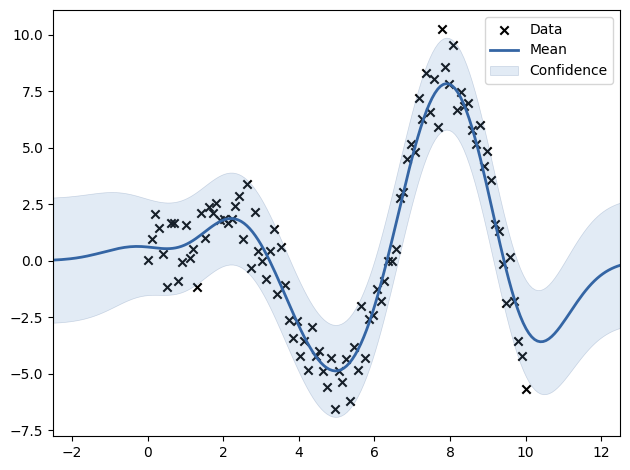

In [24]:
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

# Example : Gaussian process model for multiple dimension data

In [25]:
# Load the diabetes dataset and create a dataframe
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [27]:
# Add the target variable to the dataframe
df['target'] = diabetes.target

In [28]:
# training dataset
X = df[['age', 'sex', 'bmi', 'bp']].values
y = df[['target']].values

In [29]:
# training dataset
X = df[['age', 'sex', 'bmi', 'bp']].values
y = df[['target']].values

In [30]:

# create GPR model
m = GPy.models.GPRegression(X, y, kernel = kernel, normalizer = True)

 /usr/local/lib/python3.10/dist-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 1 then the given X dimension 4. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


In [31]:
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [32]:
intervals = m.predict_quantiles(X)

In [33]:
df['quantile_2.5%'] = intervals[0]
df['quantile_97.5%'] = intervals[1]

In [34]:
compare_dataset = df[['age', 'sex', 'bmi', 'bp', 'target', 'quantile_2.5%', 'quantile_97.5%']]

In [35]:
compare_dataset.head(20)

,age,sex,bmi,bp,target,quantile_2.5%,quantile_97.5%
0,0.038076,0.050680,0.061696,0.021872,151.0,6.765502,309.072533
1,-0.001882,-0.044642,-0.051474,-0.026328,75.0,0.744719,302.943626
2,0.085299,0.050680,0.044451,-0.005670,141.0,13.689937,316.433067
3,-0.089063,-0.044642,-0.011595,-0.036656,206.0,-12.758882,290.033195
4,0.005383,-0.044642,-0.036385,0.021872,135.0,1.848994,304.049765
5,-0.092695,-0.044642,-0.040696,-0.019442,97.0,-13.329159,289.512215
6,-0.045472,0.050680,-0.047163,-0.015999,138.0,-5.956269,296.397370
7,0.063504,0.050680,-0.001895,0.066629,63.0,10.522480,313.022863
8,0.041708,0.050680,0.061696,-0.040099,110.0,7.306017,309.634741
9,-0.070900,-0.044642,0.039062,-0.033213,310.0,-9.914556,292.660448
